In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score

df = pd.read_csv("DATA/code_snippets_data.csv", index_col=0)
df

,text,extension
0,"{\n ""cells"": [\n {\n ""cell_type"": ""ma...",.ipynb
1,import pandas as pd\nimport numpy as np\nimpor...,.py
2,---\ntitle: 'Visualizing U.S. Commutes'\nautho...,.rmd
3,"{\n ""cells"": [\n {\n ""cell_type"": ""co...",.ipynb
4,# This Python 3 environment comes with many he...,.py
...,...,...
59768,import pandas as pd\nimport sklearn\nfrom skle...,.py
59769,from nltk.stem.porter import *\nimport pandas ...,.py
59770,import numpy as np\nimport csv\nimport sys\nim...,.py
59771,1+2+3+4+5+6+7+8+9+10+11+12+13+14+15+16+17+18\n...,.r


In [2]:
df = df.dropna().reset_index(drop=True)
df

,text,extension
0,"{\n ""cells"": [\n {\n ""cell_type"": ""ma...",.ipynb
1,import pandas as pd\nimport numpy as np\nimpor...,.py
2,---\ntitle: 'Visualizing U.S. Commutes'\nautho...,.rmd
3,"{\n ""cells"": [\n {\n ""cell_type"": ""co...",.ipynb
4,# This Python 3 environment comes with many he...,.py
...,...,...
59605,import pandas as pd\nimport sklearn\nfrom skle...,.py
59606,from nltk.stem.porter import *\nimport pandas ...,.py
59607,import numpy as np\nimport csv\nimport sys\nim...,.py
59608,1+2+3+4+5+6+7+8+9+10+11+12+13+14+15+16+17+18\n...,.r


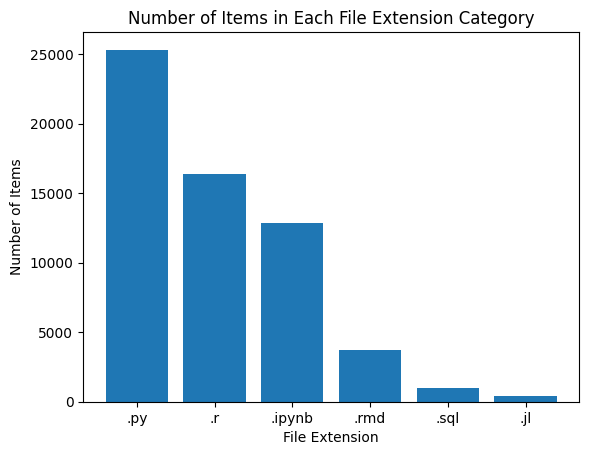

In [63]:
from matplotlib import pyplot as plt

values = df['extension'].value_counts().keys().tolist()
counts = df['extension'].value_counts().tolist()

plt.bar(values, counts)
plt.xlabel('File Extension')
plt.ylabel('Number of Items')
plt.title('Number of Items in Each File Extension Category')
plt.show()

plt.show()

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["text"])
y = df["extension"]

In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
X = df['text'].values
y = df['extension'].values

le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

# Preprocess the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_seq, maxlen=200)

2023-08-30 21:11:40.299013: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-30 21:11:40.876861: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-30 21:11:40.877620: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 21:11:45.894026: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', random_state=42)
scores_svg = cross_val_score(clf, X_padded, y, cv=5)
scores_svg

In [10]:
scores_svg = [0.97190069, 0.96862942, 0.96544204, 0.95730582, 0.97408153]

In [ ]:
# Initialize cross-validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store validation results
losses = []
accuracies = []

# Iterate through cross-validation folds
for train_index, test_index in skf.split(X_padded, y):
    X_train, X_test = X_padded[train_index], X_padded[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Build the LSTM model
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
    model.add(LSTM(units=128))
    model.add(Dense(units=len(set(y)), activation='softmax'))
    model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train, batch_size=64, epochs=5, verbose=0)
    
    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test, y_test)
    losses.append(loss)
    accuracies.append(accuracy)
    
# Print average validation results
print(f'Average loss: {np.mean(losses):.4f}, Average accuracy: {np.mean(accuracies):.4f}')